## Hypothesis Testing

# 1. Preparing the data

**Import Relevant Libraries for Data Analysis** 

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import scipy.stats as stats
from scipy.special import logit
from scipy.stats import norm

Read two csv data files, white and red, in two separate data frames. Data files have headers and are separated by semicolon ";"

In [2]:
urlw='../Resources/winequality-white.csv'
dfw = pd.read_csv(urlw, sep=';')  
urlr='../Resources/winequality-red.csv'
dfr = pd.read_csv(urlr, sep=';')   

In [3]:
dfw.info() # overview of white wine data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


There are 4898 records and 13 columns (12 inputs and 1 output: quality) in the white wine data frame, most of the data are float type with quality and color as integer and object/string. There are no missing values.

In [4]:
dfw.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
dfr.info() # overview of white wine data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are 1599 records and 13 columns (12 inputs and 1 output: quality) in the red wine data frame, same as white wine data. Data type also match those in white wine data. There are no missing values.

In [6]:
dfr.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Combine the white and red wine data into one new data frame and reset index to default so indexes for all records are sequential.

In [7]:
df=dfw.copy() # combine the red and white data frames
df=df.append(dfr)
df=df.reset_index(drop=True) # reset index to default so both white and red wine records are sequential 

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Add a new column for wine color for each data frame.

In [9]:
df['color']="white"
df.iloc[4898:,12]="red"

In [10]:
df.iloc[4895:4900] # confirm assignment was done correctly

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white
4898,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
4899,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red


In [11]:
df.info() #4898 records (White wine) and last 1599 records (Red wine), which sums up to a total of 6497 records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


# 2. Hypothesis Testing

We decided to test some of the observations we gathered in the analysis we performed last semester.
While many hypotheses can be tested using this dataset, following 3 are the ones we found most relevant based on prior analysis.

**Hypothesis 1:**
* We were intrigued in uncovering whether there is a difference in quality between red and white wines or not.

$H_0$ : Null hypothesis - mean quality scores for red and white wines are the same

$H_𝑎$ : Alternative hypothesis - mean quality scores for red and white wines are different

        

**Hypothesis 2:**
* Is there significant difference between the amount of alcohol in red and white wines?


$H_0$ : Null hypothesis - there is no significant difference in alcohol amount (ABV%) between red and white wines

$H_𝑎$ : Alternative hypothesis - there is a difference in alcohol amount (ABV%) between red and white wines
        


**Hypothesis 3:**
* Is wine quality affected by alcohol levels?


$H_0$ : Null hypothesis - there is no significant difference in wine quality between wines with below average ABV% and wines with above average ABV%

$H_𝑎$ : Alternative hypothesis - wines with higher ABV% are of significantly better quality than wines with lower ABV%

In [12]:
dft4=df.groupby('color').mean().transpose() # compare mean values of attributes by wine color
dft4

color,red,white
fixed acidity,8.319637,6.854788
volatile acidity,0.527821,0.278241
citric acid,0.270976,0.334192
residual sugar,2.538806,6.391415
chlorides,0.087467,0.045772
free sulfur dioxide,15.874922,35.308085
total sulfur dioxide,46.467792,138.360657
density,0.996747,0.994027
pH,3.311113,3.188267
sulphates,0.658149,0.489847


## Hypothesis 1



#### Testing Hypothesis 1

Given that we want to find out if the two populations have the same mean quality score, we are using the **two-sample hypothesis test**.



$H_0$ : $\mu_r = \mu_w$

$H_𝑎$ : $\mu_r \neq \mu_w$

Where $µ_r$ is the mean score for the quality of red wines and $µ_w$ is the mean score for the quality of white wines. We are looking at whether there is difference between the averages for quality scores of red and white wines or not.

#### Verifying normality assumptions

In [13]:
df1=df[df['color'] == 'white']['quality']

df2=df[df['color'] == 'red']['quality']

(array([0.03113516, 0.2478903 , 0.37396216, 0.14972097, 0.03062474]),
 array([3. , 4.2, 5.4, 6.6, 7.8, 9. ]),
 <a list of 5 Patch objects>)

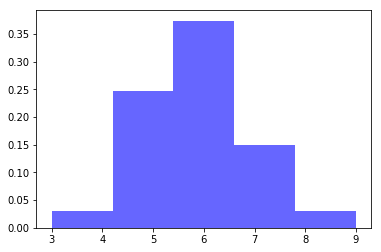

In [14]:
# Fit a normal distribution to the white wine quality data
mu, std = norm.fit(df1)

# Plot the histogram
plt.hist(df1, bins=5, density=True, alpha=0.6, color='b')

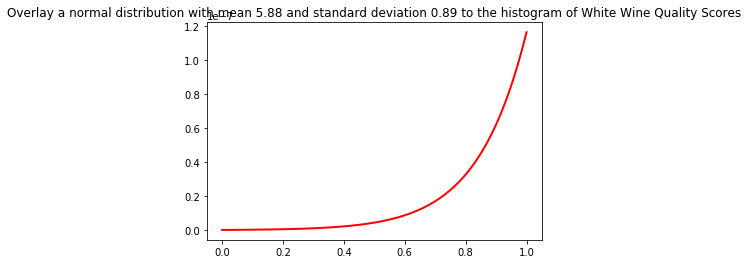

In [15]:
# Plot the PDF
xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, 100)

p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', color='r', linewidth=2)

title = "Overlay a normal distribution with mean %.2f and standard deviation %.2f to the histogram of White Wine Quality Scores" % (mu, std)

plt.title(title)

plt.show()

(array([0.00625391, 0.03314572, 0.42589118, 0.39899937, 0.13570982]),
 array([3., 4., 5., 6., 7., 8.]),
 <a list of 5 Patch objects>)

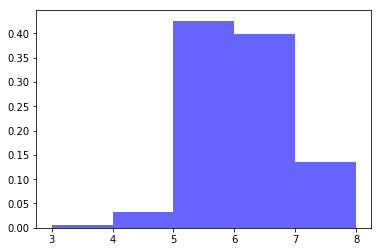

In [16]:
# Fit a normal distribution to the red wine quality data
mu, std = norm.fit(df2)

# Plot the histogram.
plt.hist(df2, bins=5, density=True, alpha=0.6, color='b')

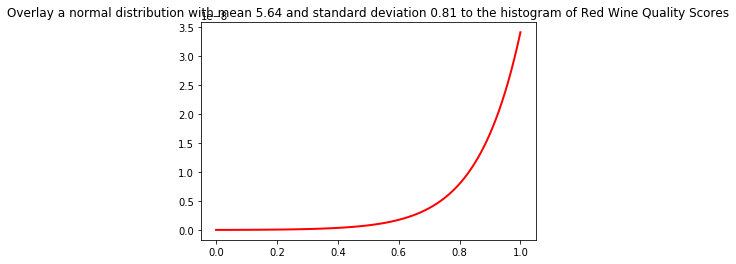

In [17]:
# Plot the PDF
xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, 100)

p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', color='r',linewidth=2)

title = "Overlay a normal distribution with mean %.2f and standard deviation %.2f to the histogram of Red Wine Quality Scores" % (mu, std)

plt.title(title)

plt.show()

The quality scores range between 3 and 9 (on a 10-point scale) and the bar chart for White wines is shaped in a bell curve, which suggests that there are no obvious departures from the normal model.

The quality scores range between 3 and 8 (on a 10-point scale) and the bar chart for Red wines is skewed to the left, which isn't an issue given that the sample size is of 1599.

Because the normality conditions are reasonably satisfied, we can apply the t-distribution to this setting.

#### Calculating the p-value

In [18]:
stats.ttest_ind(df1, df2, equal_var = False)

Ttest_indResult(statistic=10.149363059143164, pvalue=8.168348870049682e-24)

We reject the null hypothesis since p < 0.05. 

The mean quality of white wines (5.88) is significantly higher than of red wines (5.64).

## Hypothesis 2

#### Testing Hypothesis 2

Given that we want to find out if the two populations have the same mean ABV%, we are using the **two-sample hypothesis test**.

For ABV% content


$H_0$ : $\mu_r = \mu_w$

$H_𝑎$ : $\mu_r \neq \mu_w$

Where $µ_r$ is the mean ABV% for red wines and $µ_w$ is the mean ABV% for white wines.We are looking at whether there is a difference between the averages for alcohol content of red and white wines or not.

#### Verifying normality assumptions

In [19]:
df3=df[df['color'] == 'white']['alcohol']

df4=df[df['color'] == 'red']['alcohol']

(array([0.13912854, 0.28484306, 0.22886234, 0.13089609, 0.02272158]),
 array([ 8.  ,  9.24, 10.48, 11.72, 12.96, 14.2 ]),
 <a list of 5 Patch objects>)

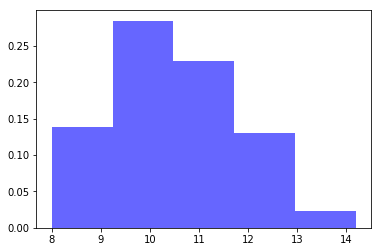

In [20]:
# Fit a normal distribution to the alcohol levels of white wines
mu, std = norm.fit(df3)

# Plot the histogram.
plt.hist(df3, bins=5, density=True, alpha=0.6, color='b')

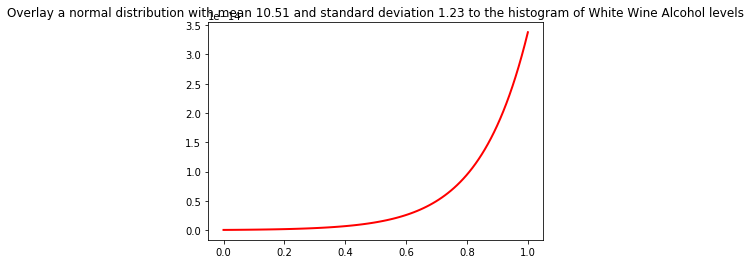

In [21]:
# Plot the PDF
xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, 100)

p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', color='r',linewidth=2)

title = "Overlay a normal distribution with mean %.2f and standard deviation %.2f to the histogram of White Wine Alcohol levels" % (mu, std)

plt.title(title)

plt.show()

(array([0.26555058, 0.27902054, 0.16885553, 0.05195555, 0.00384856]),
 array([ 8.4,  9.7, 11. , 12.3, 13.6, 14.9]),
 <a list of 5 Patch objects>)

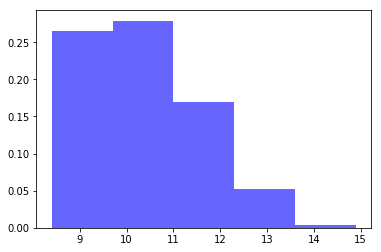

In [22]:
# Fit a normal distribution to the alcohol levels of red wines
mu, std = norm.fit(df4)

# Plot the histogram.
plt.hist(df4, bins=5, density=True, alpha=0.6, color='b')

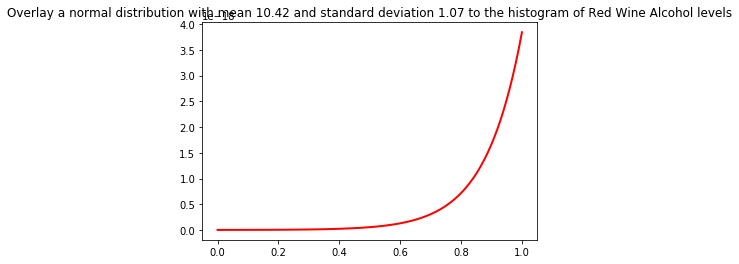

In [23]:
# Plot the PDF.
xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, 100)

p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', color='r',linewidth=2)

title = "Overlay a normal distribution with mean %.2f and standard deviation %.2f to the histogram of Red Wine Alcohol levels" % (mu, std)

plt.title(title)

plt.show()

Both bar charts are skewed to the right, which isn't an issue given that the sample sizes are of 4898 for white wines and of 1599 for red wines. 

Because the normality conditions are reasonably satisfied, we can apply the t-distribution to this setting.

#### Calculating the p-value

In [24]:
stats.ttest_ind(df4, df3, equal_var = False)

Ttest_indResult(statistic=-2.8590287839639124, pvalue=0.004277779864993429)

We reject the null hypothesis since p < 0.05.

White wines have a higher mean alcohol level of 10.51% compared to red wines which have a mean alcohol level of 10.42%.

## Hypothesis 3

So far, we have uncovered that white wines are preferred to red wines and that white wines have higher alcohol content. These 2 findings prompted us to look into whether there is a significant difference in quality levels between wines with high and low alcohol content or not.

#### Testing Hypothesis 3

We are using a **one-sided z-test** to evaluate whether wine quality is better when wines have high alcohol content.


$H_0$ : Quality of wine is the same regardless of ABV%

$H_𝑎$ : Wines with higher ABV% are better quality wines

We are interested in finding out if there’s a significant difference in quality of wines with higher alcohol content (a higher alcohol by volume (ABV) percentage) compared to the population of wines gathered in these 2 data sets.

In [25]:
# importing libraries to calculate the Pearson's correlation between two variables

from scipy.stats import pearsonr

import scipy.integrate as integrate
import scipy
from matplotlib import pyplot

import math

In [26]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [27]:
df.mean()

fixed acidity             7.215307
volatile acidity          0.339666
citric acid               0.318633
residual sugar            5.443235
chlorides                 0.056034
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
quality                   5.818378
dtype: float64

The mean of ABV% is 10.49,  we will  categorize wines with higher alcohol content as any wine that has ABV% higher than 10.49%.
Our original sample will become the population and we will create a sample using wines with high ABV%.

In [28]:
# drop rows where ABV% is equal or lower than the mean

HighABV = df.drop(df[(df.alcohol <= 10.491801)].index)
HighABV.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,white
10,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5,white
12,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,0.63,10.8,5,white
13,6.6,0.16,0.40,1.50,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7,white
15,6.6,0.17,0.38,1.50,0.032,28.0,112.0,0.9914,3.25,0.55,11.4,7,white


In [29]:
HighABV.count()

fixed acidity           3006
volatile acidity        3006
citric acid             3006
residual sugar          3006
chlorides               3006
free sulfur dioxide     3006
total sulfur dioxide    3006
density                 3006
pH                      3006
sulphates               3006
alcohol                 3006
quality                 3006
color                   3006
dtype: int64

There are 3006 records left in the new dataset, where ABV% is greater than the mean of 10.49. This is 46% of our original dataset of 6497.

In [30]:
HighABV.mean()

fixed acidity             7.115685
volatile acidity          0.325321
citric acid               0.322339
residual sugar            3.904890
chlorides                 0.047010
free sulfur dioxide      27.699268
total sulfur dioxide    101.153859
density                   0.992812
pH                        3.233017
sulphates                 0.528999
alcohol                  11.568856
quality                   6.184963
dtype: float64

In [31]:
HighABV.std()

fixed acidity            1.341142
volatile acidity         0.153839
citric acid              0.134445
residual sugar           3.459175
chlorides                0.023416
free sulfur dioxide     16.034651
total sulfur dioxide    47.991066
density                  0.002704
pH                       0.165937
sulphates                0.151152
alcohol                  0.811600
quality                  0.876607
dtype: float64

#### Verifying normality assumptions

In [32]:
df5=df['quality']

(array([0.03155302, 0.27422913, 0.36375763, 0.13839721, 0.02539634]),
 array([3. , 4.2, 5.4, 6.6, 7.8, 9. ]),
 <a list of 5 Patch objects>)

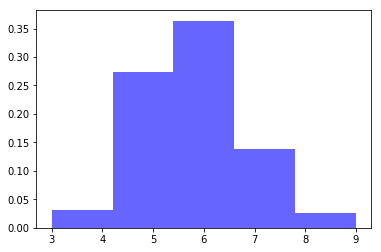

In [33]:
# Distribution of wine quality scores for all wines
mu, std = norm.fit(df5)
 
# Plot the histogram.
plt.hist(df5, bins=5, density=True, alpha=0.6, color='b')

In [34]:
df6=HighABV['quality']

(array([0.02439565, 0.12502772, 0.39947882, 0.23841206, 0.04601907]),
 array([3. , 4.2, 5.4, 6.6, 7.8, 9. ]),
 <a list of 5 Patch objects>)

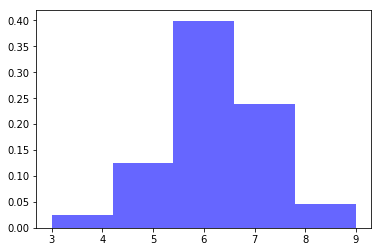

In [35]:
# Distribution of wine quality scores for wines with high alcohol content
mu, std = norm.fit(df6)

# Plot the histogram.
plt.hist(df6, bins=5, density=True, alpha=0.6, color='b')

The data looks normally distributed in both datasets. There is a slight skew to the right for the original dataset and a slight skew to the left in the high ABV% dataset, which isn't an issue given that the sample sizes are of 6497 and 3006 respectively. It already suggests that wines with higher ABV% have higher quality scores, but we will confirm by calculating the z-score.

#### Calculating the p-value

In [36]:
# std for the quality attribute (from new dataset)
sigma = 0.876607

# sample size
n = 3006

# population quality mean (from original dataset)
mu_quality = 5.818378

# sample quality mean (from new dataset)
x_bar_quality = 6.184963

In [37]:
# SE = σ/√n
se = sigma / math.sqrt(n)
se

0.015988600318228647

In [38]:
zscore = (x_bar_quality - mu_quality) / se
zscore

22.927898171427497

We reject the null hypothesis that wines with above average ABV% have the same quality as all other wines - meaning that the quality of wines with higher alcohol content is significantly higher.

# 3. Conclusion

* We tested the 2 following types of hypotheses
    * We drew inferences by comparing features between red and white wines
    * We drew inferences by treating a subset of our data as a sample and the rest of the data as the population 


* The mean quality value was higher for White wine than it was for Red wine. This came to us as a surprise based on popular knowledge, but given that White wines are typically sweeter and are made to highlight their floral aromas and acidity, the slight preference for White wine makes sense. Portugal has the advantage of numerous indigenous grape varieties that are able to keep their acidity in hot climates, and including these in a blend provides balancing freshness for rich White wines. The region is known for its White wines (86%) and is the main source of a unique style of White wine.


* We did not initially expect White wines to have significantly higher ABV% than Red wines, but the data uncovered a significant difference between the ABV% of Red and White wines. This highlights the importance of hypothesis testing and how data driven conclusions are much more robust than our own expectations. Given the climate in the North-West corner of Portugal, the grape varieties that grow in that region make wines with high ABV%.


* As we expected, alcohol level has a positive impacts over wine likability. According to experts, the alcohol content of wine has spiked considerably in recent years. “There’s pressure on winemakers from critics for intense flavors” - this increase in demand for wines with higher alcohol content could explain why, in our sample, the quality scores were significantly higher for wines with above average alcohol content. Thus, we now know that wine quality increases with more alcohol content for both Red and White wine.

In conclusion, if you are ever interested to try a Vinho Verde wine and are not a wine connoisseur, your best bet is to get a White wine with high alcohol content. If you prefer Red wines, your best chances of getting a good quality wine is to purchase the one with the highest alcohol content.

# 4. References
    1. Data set: https://archive.ics.uci.edu/ml/datasets/Wine+Quality
    2. https://www.tandfonline.com/doi/full/10.1080/15140326.2018.1550596
    3. https://www.realsimple.com/holidays-entertaining/entertaining/food-drink/alcohol-content-wine
    4. https://en.wikipedia.org/wiki/Vinho_Verde
    5. http://www.winesofportugal.info/pagina.php?codNode=18007
    6. https://winefolly.com/review/what-wines-to-drink-from-portugal-by-region/
    7. https://www.eater.com/drinks/2016/6/23/12005984/vinho-verge-portugal-wine-cheap